# MSDS 458: Research/Programming Assignment #4 (Final Assignment): Part 5

**Management Problem**

For this final research assignment, I apply deep learning methods that we covered in the course (MSDS 458) to conduct sentiment analysis of Twitter data, a challenging yet important field of study for organizations in both public and private sectors. Twitter is a popular platform where entities at all levels—governments, businesses, country leaders, celebrities, and even the average social media user—express their opinions. The content of such tweets could represent a country's official policy or collectively, a country's public sentiment toward a particular issue. Given the massive volume of tweets generated each day—on average, [6,000 tweets are posted on Twitter every second](https://www.internetlivestats.com/twitter-statistics/) —there is immense value in being able quickly and accurately determine such sentiment values (e.g., positive or negative). I combine natural language processing (NLP) and deep learning techniques to build a robust Twitter sentiment classification model. 

**Corpus Description**

The corpus I use is Stanford University's [Sentiment140](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). The dataset is a CSV file consisting of 1.6 million English-language tweets. The tweets are annotated using six attributes: 1. polarity of the tweet (0 = negative, 2 = neutral, 4 = positive); 2. ID; 3. date; 4. query; 5. username; 6. text.  For this project, I plan to use the polarity and text content to build a model that could take any given tweet and determine the most probable sentiment value.

**Methods**

***Text Preprocessing & Data Exploration***
<p>Given the massive number of documents in the corpus (one tweet = one document), it is important to ensure the data, particularly each tweet's text, is cleaned and tokenized properly for any follow-on modeling tasks. Regular expressions are useful in handling any emoticons or special characters (e.g., @ symbols and hashtags). As part of the data exploration step, I also generate visualizations using histograms and word clouds representing various aspects of the tweets (e.g., text content, null values, positive/negative/neutral breakdown, etc.) to gain a broad understanding of both qualitative and quantitative aspects of the corpus.</p>

***Text Vectorization***
<p>While the focus of this project is evaluating optimal deep neural network (DNN) architectures and parameters for Twitter sentiment analysis, such work is dependent on proper experimentation and implementation of various text vectorization methods. I leverage the techniques I learned in MSDS 453 for this task, which include applying word embedding approaches such as TF-IDF and Doc2vec. Since there are 1.6 million documents, it is important for me to limit the vocabulary by tuning the vectorizer hyperparameters (e.g., max_features, max_df) and exploring dimensionality reduction techniques, such as PCA.</p>
<p>I evaluate the vectors using various classifiers to ensure I have the optimal number of features in training for the classification models. I experiment with both traditional classifiers (e.g., logistic regression, random forest, and ensemble methods) and neural networks.</p>

***Building Neural Network-Based Models***
<p>The main part of this research assignment entails careful experimentation of various DNNs we covered in MSDS 458, including fully-connected dense networks, recurrent neural networks (RNN), long short-term memory networks (LSTM), and convolutional neural networks (CNN). The neural networks are built using Keras. The evaluation method to determine the best classification model consists of a strict training-and-test regimen using a crossed experimental design (e.g., maintain consistent hyperparameter settings for consistency). Vocabulary size and word embeddings also remain consistent. I experiment with various network structure designs, hyperparameter settings, and model fit methods by taking the input data (i.e., processed tweet text vectors) through single to multiple layers consisting of varying nodes/units across dense networks, RNNs, LSTM networks, and CNNs.</p>

**Evaluation**
<p>I track and compare training/testing times as well as accuracy and loss curves for train, validation, and test datasets to evaluate the deep learning models' performances. I also provide charts and plots summarizing these key metrics to visually capture which neural network structures and models yield the strongest performance, in terms of implementation time and accuracy.</p>

## NOTES

This notebook is a continuation (part 4 of 6) of MSDS 458 Final Assignment. You need access to the clean_tweets.csv file in order to run the following code.

In parts 3-6, I use observations and findings from parts 1 and 2 to train various neural network models:

* EXPERIMENT 1: Fully connected dense neural network (DNN)
* EXPERIMENT 2: Simple RNN
* **EXPERIMENT 3: LSTM RNN**
* EXPERIMENT 4: 1D CNN

The objective is to see if I can train a neural network model that could perform better than traditional machine learning models, namely logistic regrssion using a trigram TF-IDF vectorization.

This notebook covers **Experiment 3: LSTM RNN**

## Import packages needed (and set seed)

Since Keras in part of TensorFlow 2.x, we import keras from tensorflow and use tenserflow.keras.xxx to import all other Keras packages. The seed argument produces a deterministic sequence of tensors across multiple calls.

In [0]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import models
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Embedding
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.preprocessing import sequence
# keras.__version__

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import os

from google.colab import files
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import utils
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction import text
from time import time

from pprint import pprint
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
seed = 50
np.random.seed(seed)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Flatten
from keras.callbacks import ModelCheckpoint
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4')

# Check working directory
!pwd

# Check files in directory
!ls

/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4
clean_tweets.csv
clf_compare_accuracy_summary.csv
cvec_tfidf_accuracy_summary.csv
d2v_model_dbow.doc2vec
d2v_model_dbow.doc2vec.docvecs.vectors_docs.npy
d2v_model_dbow.doc2vec.trainables.syn1neg.npy
d2v_model_dbow.doc2vec.wv.vectors.npy
Data
dbow_cvec_tfidf_accuracy_summary.csv
dmm_dbow_cvec_tfidf_accuracy_summary.csv
glove.twitter.27B
model_dnn1.h5
model_dnn2.h5
model_dnn3.h5
model_lstm1.h5
model_lstm2.h5
model.png
model_rnn1.h5
model_rnn2.h5
model_rnn3.h5
ngram_accuracy_comparison_plot.png
results1.pkl
results2.pkl
results2_v2.pkl
results2_v3.pkl
results3.pkl


In [0]:
df = pd.read_csv('clean_tweets.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


## Model Training Prep

Train / Dev / Test Split

Given the 1.5 million+ size of the dataset, I will split the data into training, validation, and test data.

In [0]:
x = df.text
y = df.target

In [0]:
SEED = 5000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [0]:
print("Train set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564120 entries with 50.02% negative tweets, 49.98% positive tweets.
Validation set has total 15960 entries with 49.18% negative tweets, 50.82% positive tweets.
Test set has total 15961 entries with 49.86% negative tweets, 50.14% positive tweets.


## Train/Test Timer Functions

In [0]:
# Define callback to get total training time
import datetime

class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()


# Define callback to get total test time

class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

train_rt = TrainRuntimeCallback()
test_rt = TestRuntimeCallback()

## Hyperparameter Settings

In [0]:
num_epochs = 10
batch_size = 64
# validation_split = 0.20
patience = 3
# cbs = [train_rt, keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)]

optimizer='rmsprop'
loss='binary_crossentropy'
metrics=['accuracy']

dropout = 0.2
LSTM_units = 128

## TF-IDF + Logistic Regression (Trigram) - **NOT REQUIRED FOR THIS NOTEBOOK**

In part 2, I discovered that a logistic regression model with a trigram TF-IDF vectorization resulted in the highest accuracy (higher than the Doc2vec+DBOW model or Doc2vec+DMM models). I will generate the accuracy scores for both the train and validation data as reference points for the subsequent neural network model.

In [0]:
tfidf_vector = TfidfVectorizer(max_features=80000,ngram_range=(1, 3))
tfidf_vector.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=80000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#vectorizing train data
x_train_tfidf = tfidf_vector.transform(x_train)

In [0]:
#vectorizing validation data
x_validation_tfidf = tfidf_vector.transform(x_validation).toarray()

In [0]:
# vectorizing test data
x_test_tfidf = tfidf_vector.transform(x_test).toarray()

In [0]:
%%time
lr_clf = LogisticRegression()
lr_clf.fit(x_train_tfidf, y_train)

CPU times: user 3min 25s, sys: 15min 35s, total: 19min 1s
Wall time: 42.9 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
lr_clf.score(x_validation_tfidf, y_validation)

0.8320175438596491

In [0]:
lr_clf.score(x_train_tfidf, y_train)

0.8359831726466

In [0]:
lr_clf.score(x_test_tfidf, y_test)

0.8193095670697325

**TF-IDF + Logistic Regression Accuracy Results:**
*  Training Accuracy: 83.60%
*  Validation Accuracy: 83.20%
*  Test Accuracy: 81.93%

## Text Preprocessing w/ Pre-Trained Word Embeddings

In [0]:
# import gensim.downloader as api
# glove_twitter = api.load("glove-twitter-200")

In [0]:
# len(glove_twitter.vocab.keys())

In [0]:
# embeddings_index = {}
# for w in glove_twitter.vocab.keys():
#     embeddings_index[w] = glove_twitter[w]
# print('Found %s word vectors.' % len(embeddings_index))

In [0]:
glove_dir = '/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4/glove.twitter.27B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193515 word vectors.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [0]:
len(tokenizer.word_index)

261744

In [0]:
for x in x_train[:5]:
    print(x)

run house but shit its taking me away from my homework ahhhh more classes more assignments
and we are having jaljeera party join in buddy fb
going out with friends tonight today is friends day
went paintballing yesterday got shot in the arm and it hurts but shot kid and he was cying in pain so its no all bad haha evil me
sorry ll make you chicken soup


In [0]:
sequences[:5]

[[436, 204, 17, 353, 62, 408, 14, 212, 51, 3, 578, 1517, 79, 1138, 79, 2826],
 [5, 43, 33, 171, 14239, 269, 781, 9, 1232, 647],
 [42, 31, 20, 185, 116, 37, 8, 185, 29],
 [203,
  15929,
  278,
  45,
  1106,
  9,
  2,
  1486,
  5,
  4,
  340,
  17,
  1106,
  858,
  5,
  78,
  23,
  51053,
  9,
  494,
  15,
  62,
  35,
  30,
  110,
  97,
  1549,
  14],
 [115, 73, 119, 6, 870, 1449]]

In [0]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [0]:
max(length)

40

In [0]:
# pad sequence train data
x_train_seq = pad_sequences(sequences, maxlen=45)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (1564120, 45)


In [0]:
x_train_seq[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   436,   204,    17,   353,    62,   408,    14,
          212,    51,     3,   578,  1517,    79,  1138,    79,  2826],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     5,
           43,    33,   171, 14239,   269,   781,     9,  1232,   647],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
    

In [0]:
# pad sequence val data
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=45)

In [0]:
# pad sequence test data
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=45)

I am defining the number of words to be 100,000. This means I will only care about 100,000 most frequent words in the training set. If I don't limit the number of words, the total number of vocabulary will be more than 200,000.

In [0]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

As a sanity check, if the embedding matrix has been generated properly. Above, when I saw the first five entries of the training set, the first entry started with the word "run," which had the sequential representation [436]. Let's see if the 436th embedding matrix is as same as vectors for the word 'run.'

In [0]:
np.array_equal(embedding_matrix[436] ,embeddings_index.get('run'))

True

## Training Models

### LSTM RNN (Using Pre-Trained Word Embeddings)

Pretrained word embeddings are the GloVe Twitter 200-dimension word vectors (2B tweets, 27B tokens, 1.2M vocab, uncased, 200d vectors, 1.42 GB download): glove.twitter.27B.zip

Available here: https://github.com/stanfordnlp/GloVe

#### Build Network

In [0]:
model_lstm1 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_lstm1.add(e)
model_lstm1.add(LSTM(units = LSTM_units, activation='tanh', recurrent_activation='sigmoid'))
model_lstm1.add(Dense(128, activation='relu'))
model_lstm1.add(Dense(units = 1, activation='sigmoid'))

model_lstm1.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_lstm1.h5"
lstm1_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_lstm1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 20,185,089
Trainable params: 185,089
Non-trainable params: 20,000,000
_________________________________________________________________


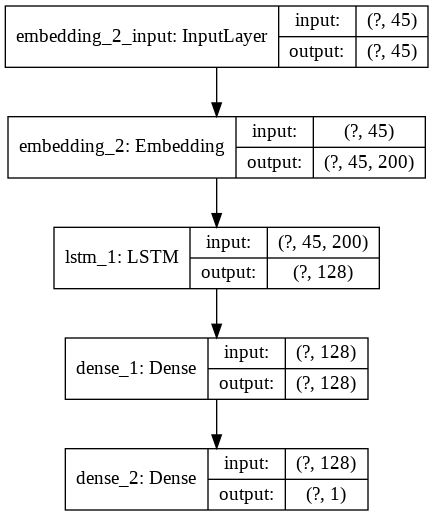

In [0]:
keras.utils.plot_model(model_lstm1, show_shapes=True)

#### Train Model

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [lstm1_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_lstm1 = model_lstm1.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 2200s 1ms/step - loss: 0.4018 - accuracy: 0.8173 - val_loss: 0.3687 - val_accuracy: 0.8367
Epoch 2/10
1564120/1564120 [==============================] - 2242s 1ms/step - loss: 0.3713 - accuracy: 0.8351 - val_loss: 0.3647 - val_accuracy: 0.8394
Epoch 3/10
1564120/1564120 [==============================] - 2239s 1ms/step - loss: 0.3615 - accuracy: 0.8407 - val_loss: 0.3656 - val_accuracy: 0.8434
Epoch 4/10
1564120/1564120 [==============================] - 2140s 1ms/step - loss: 0.3555 - accuracy: 0.8441 - val_loss: 0.3677 - val_accuracy: 0.8406
Epoch 5/10
1564120/1564120 [==============================] - 2051s 1ms/step - loss: 0.3517 - accuracy: 0.8467 - val_loss: 0.3676 - val_accuracy: 0.8422


In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

10874.661124

In [0]:
print(f"train_acc: {history_lstm1.history['accuracy'][-1]}, val_acc: {history_lstm1.history['val_accuracy'][-1]}")

train_acc: 0.846655011177063, val_acc: 0.8422305583953857


#### Save Model

In [0]:
# save model
model_lstm1.save('model_lstm1.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_lstm1.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 8s 516us/step
test_accuracy=0.8276423811912537, test_loss=0.3819438473121182


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

8.230267

In [0]:
history_dict = history_lstm1.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
4,0.367552,0.842231,0.351738,0.846655,0.827642


#### Save Performance to Dataframe

In [0]:
results_df = history_df.iloc[-1:].copy()
results_df.insert(0,'model','LSTM RNN') # want the model name to appear first
results_df['test_accuracy'] = test_acc   # test accuracy
results_df['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df['testing time (sec)'] = test_time      # we are okay with test time appearing last
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
4,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267


Appending metrics to the combined metrics dataframe to ensure the data is captured appropriately. Since training time is so long for these models, I decided to append the performance metrics immediately after each training session.

In [0]:
prev_results_df = pd.read_pickle('results2_v3.pkl')
results_df = prev_results_df.append(results_df,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
3,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
4,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
5,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


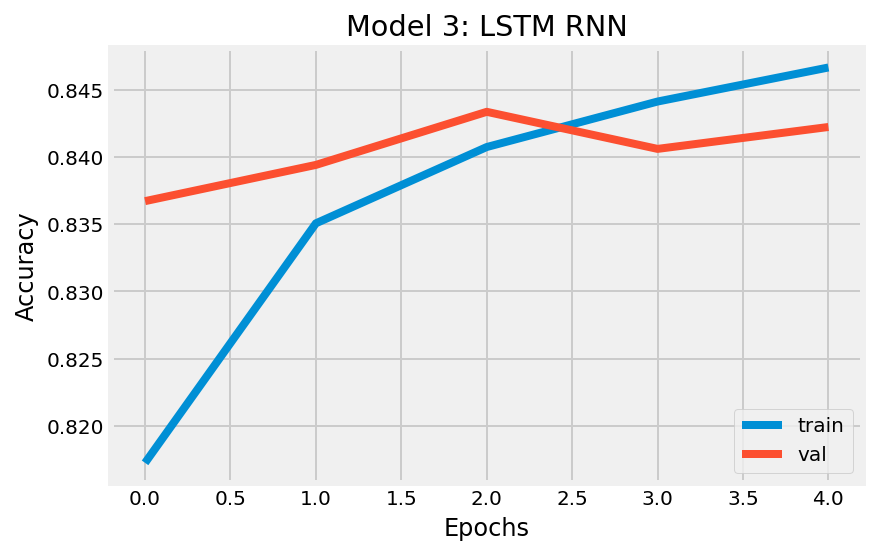

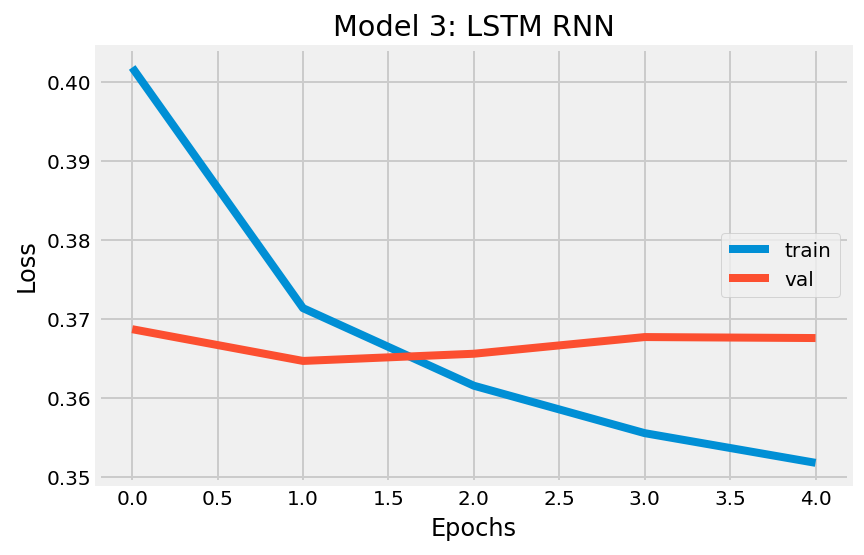

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_lstm1.history.keys())

# summarize history for accuracy
plt.plot(history_lstm1.history['train_accuracy'])
plt.plot(history_lstm1.history['val_accuracy'])
plt.title('Model 3: LSTM RNN')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_lstm1.history['loss'])
plt.plot(history_lstm1.history['val_loss'])
plt.title('Model 3: LSTM RNN')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

# from google.colab import files
# plt.savefig("model_v5_history.png")

### LSTM w/ Dropout (Using Pre-Trained Word Embeddings)

#### Build Network

This model includes a 20% dropout in between network layers. The purpose of the dropout layer is to reduce overfitting.

In [0]:
model_lstm2 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_lstm2.add(e)
model_lstm2.add(BatchNormalization())
model_lstm2.add(LSTM(units = LSTM_units, dropout=dropout, recurrent_dropout=dropout, activation='tanh', recurrent_activation='sigmoid'))
model_lstm2.add(Dense(128, activation='relu'))
model_lstm2.add(Dropout(dropout))
model_lstm2.add(Dense(units = 1, activation='sigmoid'))

model_lstm2.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_lstm2.h5"
lstm2_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_lstm2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 200)           800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 20,185,889
Trainable params: 185,489
Non-trainable params: 20,000,400
____________________________________

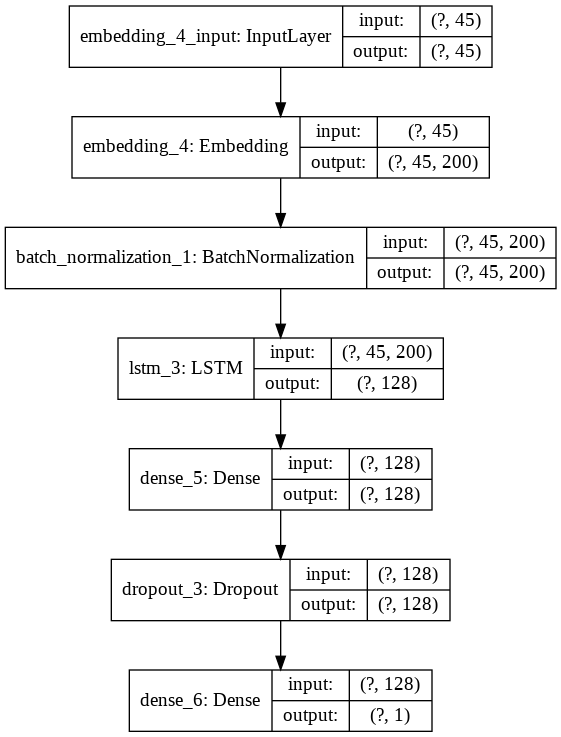

In [0]:
keras.utils.plot_model(model_lstm2, show_shapes=True)

#### Train Model

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [lstm2_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_lstm2 = model_lstm2.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=1,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/1
1564120/1564120 [==============================] - 2416s 2ms/step - loss: 0.4266 - accuracy: 0.8035 - val_loss: 0.3884 - val_accuracy: 0.8248


In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

2416.762605

In [0]:
print(f"train_acc: {history_lstm2.history['accuracy'][-1]}, val_acc: {history_lstm2.history['val_accuracy'][-1]}")

train_acc: 0.8035118579864502, val_acc: 0.8248120546340942


#### Save Model

In [0]:
# save model
model_lstm2.save('model_lstm2.h5') 

#### Training Cont... **RUN ONLY IF YOU NEED TO COMPLETE MORE EPOCHS**

Load model and continue training

In [0]:
# load model
model_lstm2 = load_model('model_lstm2.h5')

# define the checkpoint
filepath = "model_lstm2.h5"
lstm2_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

Model has completed 2 epochs already. Continuing training with 2 more epochs. I'm using this model checkpoint approach since the training time takes so long.

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [lstm2_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_lstm2 = model_lstm2.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=4,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/4
1564120/1564120 [==============================] - 2100s 1ms/step - loss: 0.4115 - accuracy: 0.8136 - val_loss: 0.3825 - val_accuracy: 0.8292
Epoch 2/4
1564120/1564120 [==============================] - 2178s 1ms/step - loss: 0.4117 - accuracy: 0.8142 - val_loss: 0.3883 - val_accuracy: 0.8272
Epoch 3/4
1564120/1564120 [==============================] - 2187s 1ms/step - loss: 0.4151 - accuracy: 0.8129 - val_loss: 0.3871 - val_accuracy: 0.8278
Epoch 4/4
1564120/1564120 [==============================] - 2148s 1ms/step - loss: 0.4199 - accuracy: 0.8112 - val_loss: 0.3917 - val_accuracy: 0.8255


In [0]:
# save model
model_lstm2.save('model_lstm2.h5') 

In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

8618.040833

In [0]:
print(f"train_acc: {history_lstm2.history['train_accuracy'][-1]}, val_acc: {history_lstm2.history['val_accuracy'][-1]}")

train_acc: 0.8111794590950012, val_acc: 0.8255012631416321


#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_lstm2.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 10s 638us/step
test_accuracy=0.8159889578819275, test_loss=0.4034617672822625


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

10.184501

In [0]:
history_dict = history_lstm2.history
# history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
3,0.391736,0.825501,0.419856,0.811179,0.815989


#### Save Performance to Dataframe

In [0]:
results_df_v2 = history_df.iloc[-1:].copy()
results_df_v2.insert(0,'model','LSTM w/ Dropout') # went the model name to appear first
results_df_v2['test_accuracy'] = test_acc
results_df_v2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_v2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_v2

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
3,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501


In [0]:
prev_results_df = pd.read_pickle('results3.pkl')
prev_results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
3,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
4,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
5,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.388435,0.824812,0.426569,0.803512,0.815989,2416.762605,10.507788


In [0]:
prev_results_df = prev_results_df.drop([7])

In [0]:
results_df = prev_results_df.append(results_df_v2,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
3,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
4,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
5,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501


In [0]:
results_df = results_df.reindex([0,1,5,2,3,4,6,7])
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
5,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
2,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
3,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
4,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


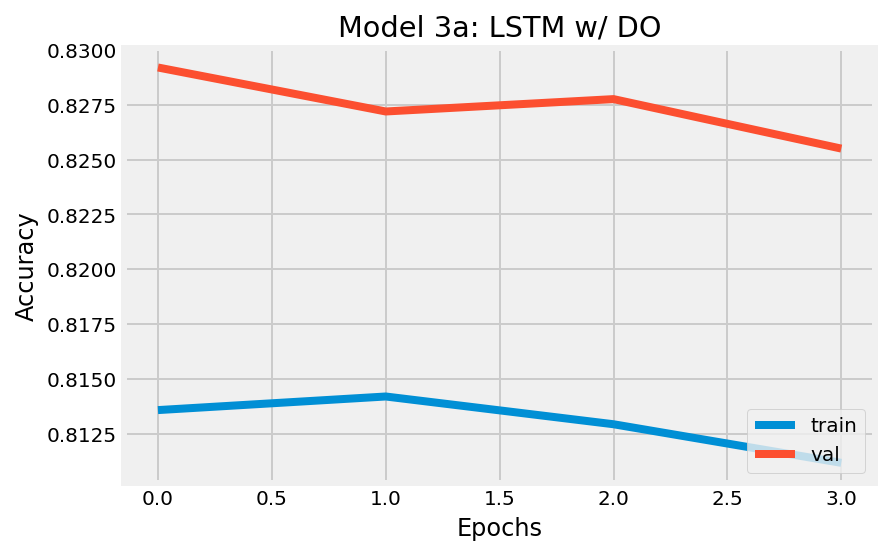

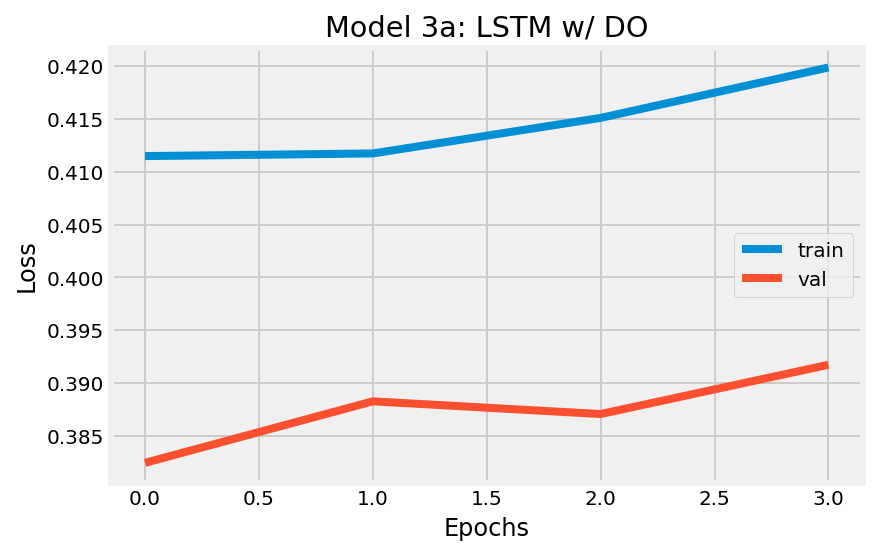

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_lstm2.history.keys())

# summarize history for accuracy
plt.plot(history_lstm2.history['train_accuracy'])
plt.plot(history_lstm2.history['val_accuracy'])
plt.title('Model 3a: LSTM w/ DO')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_lstm2.history['loss'])
plt.plot(history_lstm2.history['val_loss'])
plt.title('Model 3a: LSTM w/ DO')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

### LSTM w/ Trainable Word Embeddings

*   Trainable = True in Word Embeddings
*   No Dropout



#### Build Network

In [0]:
model_lstm3 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=True)
model_lstm3.add(e)
model_lstm3.add(LSTM(units = LSTM_units, activation='tanh', recurrent_activation='sigmoid'))
model_lstm3.add(Dense(128, activation='relu'))
model_lstm3.add(Dense(units = 1, activation='sigmoid'))

model_lstm3.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_lstm3.h5"
lstm3_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_lstm3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 20,185,089
Trainable params: 20,185,089
Non-trainable params: 0
_________________________________________________________________


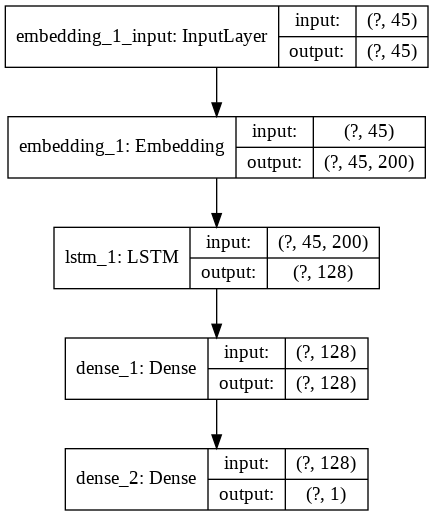

In [0]:
keras.utils.plot_model(model_lstm3, show_shapes=True)

#### Train Model

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [lstm3_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_lstm3 = model_lstm3.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=2,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/2
1564120/1564120 [==============================] - 3911s 3ms/step - loss: 0.3913 - accuracy: 0.8242 - val_loss: 0.3666 - val_accuracy: 0.8383
Epoch 2/2
1564120/1564120 [==============================] - 4046s 3ms/step - loss: 0.3664 - accuracy: 0.8386 - val_loss: 0.3652 - val_accuracy: 0.8413


More training --> 3rd epoch

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [lstm3_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_lstm3 = model_lstm3.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=1,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/1
1564120/1564120 [==============================] - 3844s 2ms/step - loss: 0.3581 - accuracy: 0.8437 - val_loss: 0.3659 - val_accuracy: 0.8422


In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

3845.252216

In [0]:
print(f"train_acc: {history_lstm3.history['accuracy'][-1]}, val_acc: {history_lstm3.history['val_accuracy'][-1]}")

train_acc: 0.8436827063560486, val_acc: 0.8421679139137268


#### Save Model

In [0]:
# save model
model_lstm3.save('model_lstm3.h5') 

#### Training Cont... **RUN ONLY IF YOU NEED TO COMPLETE MORE EPOCHS**

Load model and continue training

In [0]:
# load model
model_rnn3_load = load_model('model_rnn3.h5')

# define the checkpoint
filepath = "model_rnn3.h5"
rnn3_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model has completed 2 epochs already. Continuing training with 2 more epochs. I'm using this model checkpoint approach since the training time takes so long.

In [0]:
train_rt = TrainRuntimeCallback()
cbs = [rnn3_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_rnn3 = model_rnn3_load.fit(x_train_seq,
                    y_train,
                    callbacks=cbs,
                    epochs=2,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/2
 991552/1564120 [==================>...........] - ETA: 13:19 - loss: 0.4080 - accuracy: 0.8185

In [0]:
# save model
model_rnn3_load.save('model_rnn3.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_lstm3.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 10s 640us/step
test_accuracy=0.8319027423858643, test_loss=0.38151254751062225


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

10.213246

In [0]:
history_dict = history_lstm3.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
0,0.365883,0.842168,0.358121,0.843683,0.831903


#### Save Performance to Dataframe

In [0]:
results_df_v3 = history_df.iloc[-1:].copy()
results_df_v3.insert(0,'model','LSTM w/ Trainable Word Embeddings') # went the model name to appear first
results_df_v3['test_accuracy'] = test_acc
results_df_v3['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_v3['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_v3

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,LSTM w/ Trainable Word Embeddings,0.365883,0.842168,0.358121,0.843683,0.831903,3845.252216,10.213246


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


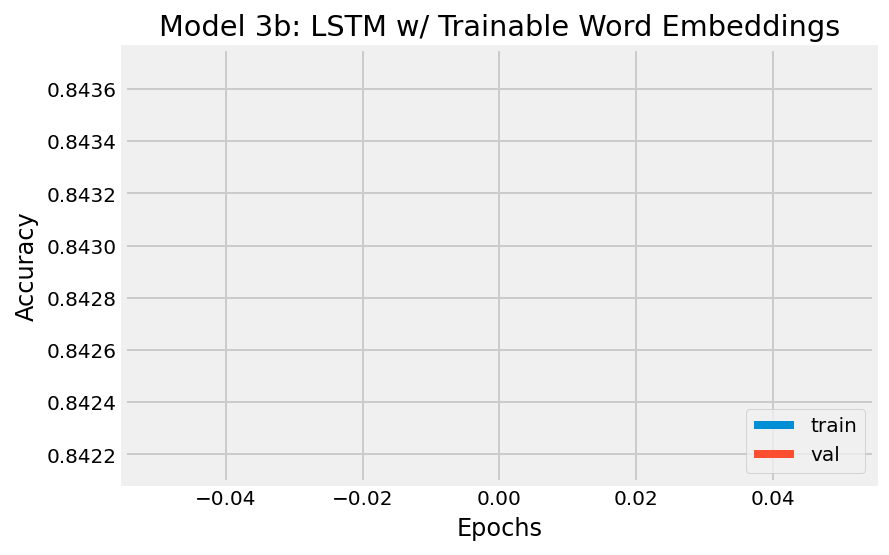

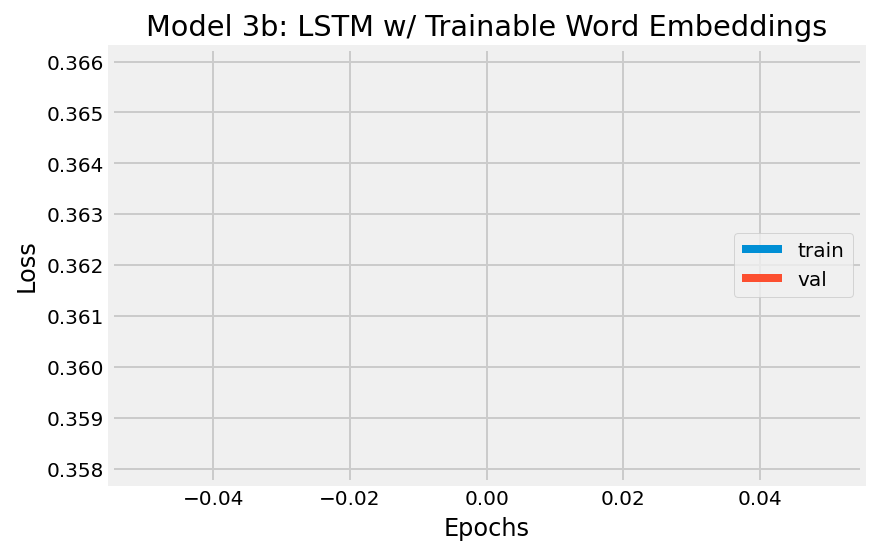

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_lstm3.history.keys())

# summarize history for accuracy
plt.plot(history_lstm3.history['train_accuracy'])
plt.plot(history_lstm3.history['val_accuracy'])
plt.title('Model 3b: LSTM w/ Trainable Word Embeddings')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_lstm3.history['loss'])
plt.plot(history_lstm3.history['val_loss'])
plt.title('Model 3b: LSTM w/ Trainable Word Embeddings')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

### Save Combined Metrics to Dataframe

In [0]:
results_df = results_df.append(results_df_v3,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879
3,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
4,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
5,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
6,LSTM RNN,0.367552,0.842231,0.351738,0.846655,0.827642,10874.661124,8.230267
7,LSTM w/ Dropout,0.391736,0.825501,0.419856,0.811179,0.815989,8618.040833,10.184501
8,LSTM w/ Trainable Word Embeddings,0.365883,0.842168,0.358121,0.843683,0.831903,3845.252216,10.213246


In [0]:
results_df.to_pickle("results3.pkl") 

In [0]:
results_df.to_csv('results3.csv', index=False)